# Time Series  - Strategies for making Time series Stationary, ACF, PACF plots

In [1]:
import warnings                         #'do not disturb' mode
warnings.filterwarnings('ignore')

import numpy as np                      # vectors and matrices
import pandas as pd                     # tables and data manipulations
import matplotlib.pyplot as plt         # plots
import seaborn as sns                   # more plots

%matplotlib inline 

In [31]:
## Accuracy Metrics

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
ads = pd.read_csv('ads.csv',index_col = 0)
currency = pd.read_csv('currency.csv',index_col = 0 )

In [3]:
ads.head()

,Ads
Time,
2017-09-13T00:00:00,80115
2017-09-13T01:00:00,79885
2017-09-13T02:00:00,89325
2017-09-13T03:00:00,101930
2017-09-13T04:00:00,121630


In [5]:
currency.head()

,GEMS_GEMS_SPENT
Time,
5/1/17,1199436
5/2/17,1045515
5/3/17,586111
5/4/17,856601
5/5/17,793775


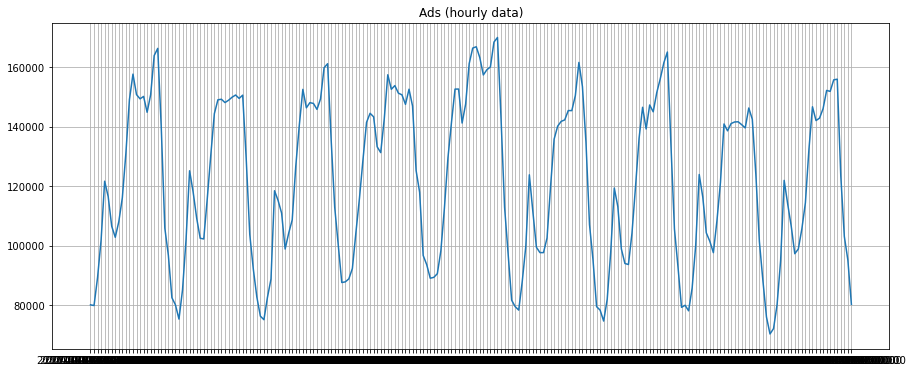

In [6]:
plt.figure(figsize=(15,6))
plt.plot(ads.Ads)
plt.title('Ads (hourly data)')
plt.grid(True)
plt.show()

## Decomposing Ads series to trend, seasonal and Residual components

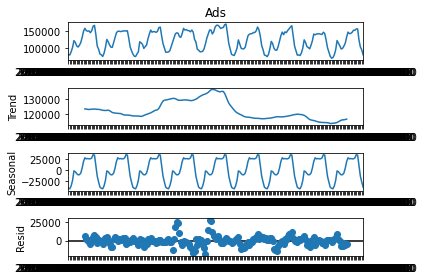

<Figure size 2520x720 with 0 Axes>

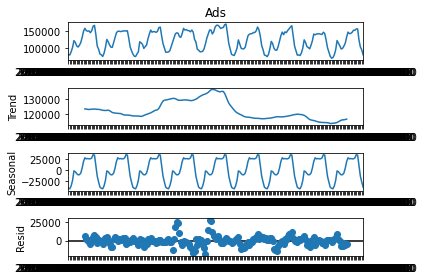

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ads.Ads, model = 'additive',period=24)
plt.figure(figsize = (35,10))
result.plot()
# plt.plot(result.trend, color= 'b')
# plt.plot(result.seasonal, color= 'r')
# plt.plot(result.resid, color = 'g')
# plt.show()

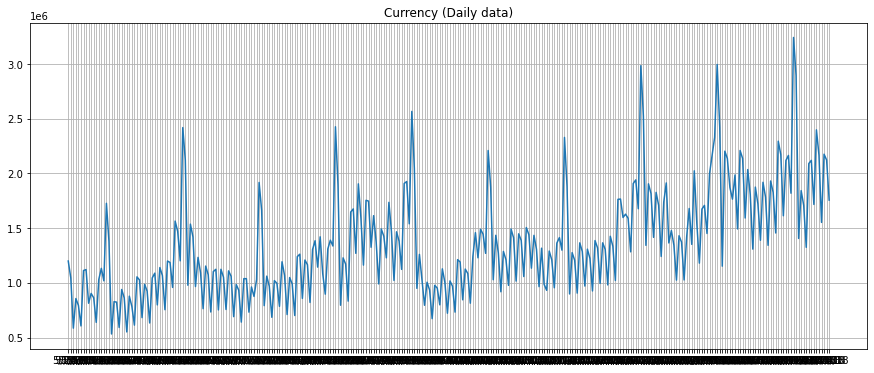

In [8]:
plt.figure(figsize=(15,6))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title('Currency (Daily data)')
plt.grid(True)
plt.show()

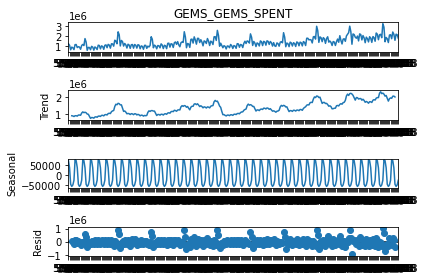

<Figure size 2520x720 with 0 Axes>

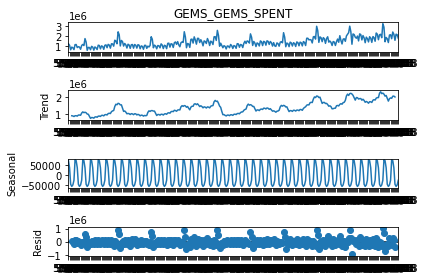

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result1 = seasonal_decompose(currency.GEMS_GEMS_SPENT, model = 'additive',period=7)
plt.figure(figsize = (35,10))
result1.plot()
# plt.plot(result.trend, color= 'b')
# plt.plot(result.seasonal, color= 'r')
# plt.plot(result.resid, color = 'g')
# plt.plot(result.trend)
# plt.show()

In [10]:
result1.seasonal.head(30)

Time
5/1/17     71172.486880
5/2/17     35523.939261
5/3/17    -47007.002915
5/4/17    -57718.744412
5/5/17    -50343.744412
5/6/17    -26849.897473
5/7/17     75222.963071
5/8/17     71172.486880
5/9/17     35523.939261
5/10/17   -47007.002915
5/11/17   -57718.744412
5/12/17   -50343.744412
5/13/17   -26849.897473
5/14/17    75222.963071
5/15/17    71172.486880
5/16/17    35523.939261
5/17/17   -47007.002915
5/18/17   -57718.744412
5/19/17   -50343.744412
5/20/17   -26849.897473
5/21/17    75222.963071
5/22/17    71172.486880
5/23/17    35523.939261
5/24/17   -47007.002915
5/25/17   -57718.744412
5/26/17   -50343.744412
5/27/17   -26849.897473
5/28/17    75222.963071
5/29/17    71172.486880
5/30/17    35523.939261
Name: seasonal, dtype: float64

In [13]:
result1.trend.head(30)

Time
5/1/17              NaN
5/2/17              NaN
5/3/17              NaN
5/4/17     8.858194e+05
5/5/17     8.746454e+05
5/6/17     8.415496e+05
5/7/17     8.868684e+05
5/8/17     8.878490e+05
5/9/17     8.657703e+05
5/10/17    9.263209e+05
5/11/17    9.291611e+05
5/12/17    9.145117e+05
5/13/17    1.044944e+06
5/14/17    1.112814e+06
5/15/17    1.065597e+06
5/16/17    1.092599e+06
5/17/17    1.063108e+06
5/18/17    9.859510e+05
5/19/17    9.746174e+05
5/20/17    8.511519e+05
5/21/17    7.330271e+05
5/22/17    7.823736e+05
5/23/17    7.761303e+05
5/24/17    7.460810e+05
5/25/17    8.120966e+05
5/26/17    8.245343e+05
5/27/17    7.987733e+05
5/28/17    8.609286e+05
5/29/17    8.675563e+05
5/30/17    8.459783e+05
Name: trend, dtype: float64

## Lets make the Currency series stationary

In [14]:
newcurr = currency.GEMS_GEMS_SPENT - result1.trend   ##Removing trend to make the series Stationary

In [18]:
newcurr = newcurr.dropna()

In [19]:
newcurr

Time
5/4/17     -29218.428571
5/5/17     -80870.428571
5/6/17    -235014.571429
5/7/17     225894.571429
5/8/17     233369.000000
               ...      
2/17/18    187382.142857
2/18/18   -193061.285714
2/19/18    366871.000000
2/20/18    130612.714286
2/21/18   -431685.285714
Length: 294, dtype: float64

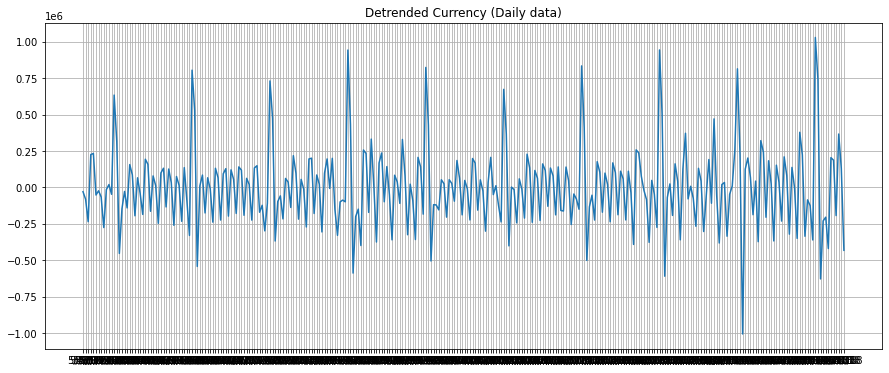

In [20]:
plt.figure(figsize=(15,6))
plt.plot(newcurr)
plt.title('Detrended Currency (Daily data)')
plt.grid(True)
plt.show()

### The trend is gone now

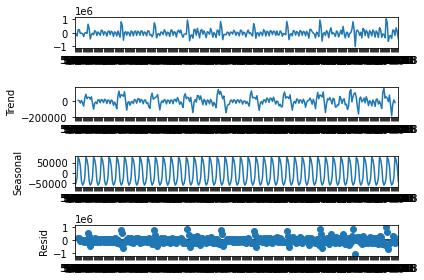

<Figure size 2520x720 with 0 Axes>

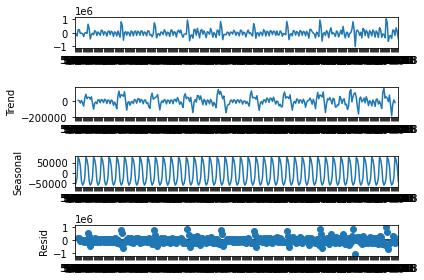

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result2 = seasonal_decompose(newcurr, model = 'additive',period=7)
plt.figure(figsize = (35,10))
result2.plot()

### The trend has become very flat , 0 trend

### Now lets remove seasonality as well from the series

In [22]:
newcurr1 = currency.GEMS_GEMS_SPENT - result1.trend - result1.seasonal

In [23]:
newcurr1 = newcurr1.dropna()

In [24]:
newcurr1

Time
5/4/17      28500.315841
5/5/17     -30526.684159
5/6/17    -208164.673955
5/7/17     150671.608358
5/8/17     162196.513120
               ...      
2/17/18    214232.040330
2/18/18   -268284.248785
2/19/18    295698.513120
2/20/18     95088.775024
2/21/18   -384678.282799
Length: 294, dtype: float64

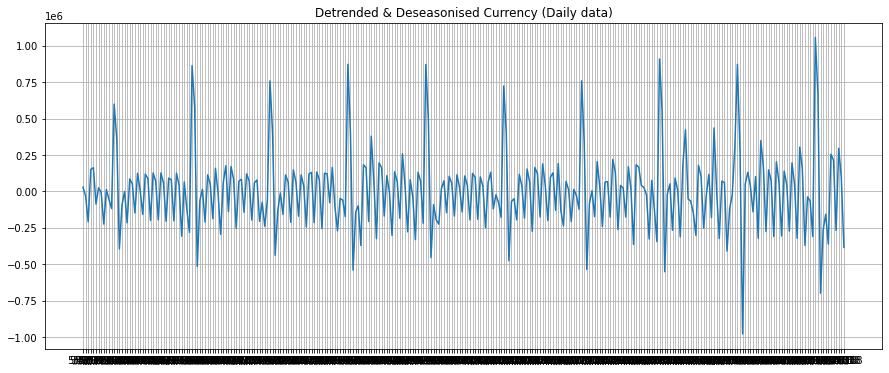

In [25]:
plt.figure(figsize=(15,6))
plt.plot(newcurr1)
plt.title('Detrended & Deseasonised Currency (Daily data)')
plt.grid(True)
plt.show()

### Removing the seasonality is not doing much, this means that the residual term itself has some seasonality in it

## Lets remove trend and seasonality from ads series

### making the ads series stationary

In [26]:
newads = ads.Ads - result.trend  #removing trend

In [27]:
newads = newads.dropna()

In [28]:
newads.head(10)

Time
2017-09-13T12:00:00    34221.458333
2017-09-13T13:00:00    27441.041667
2017-09-13T14:00:00    26203.750000
2017-09-13T15:00:00    27093.541667
2017-09-13T16:00:00    21697.395833
2017-09-13T17:00:00    27501.979167
2017-09-13T18:00:00    40562.708333
2017-09-13T19:00:00    42907.500000
2017-09-13T20:00:00    16320.312500
2017-09-13T21:00:00   -17177.604167
dtype: float64

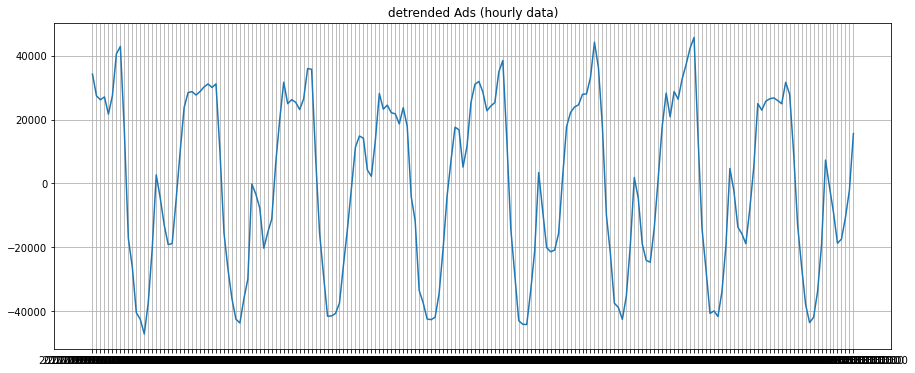

In [29]:
plt.figure(figsize=(15,6))
plt.plot(newads)
plt.title('detrended Ads (hourly data)')
plt.grid(True)
plt.show()

In [30]:
newads1 = ads.Ads - result.trend - result.seasonal   #removing trend and seasonality

In [31]:
newads1 = newads1.dropna()

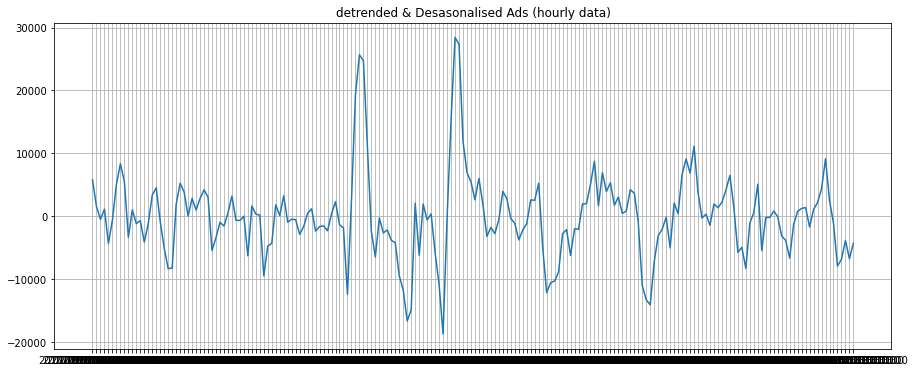

In [32]:
plt.figure(figsize=(15,6))
plt.plot(newads1)
plt.title('detrended & Desasonalised Ads (hourly data)')
plt.grid(True)
plt.show()

----------

## Augmented Dikcey Fuller test - test for stationarity

## Dickey fuller test ##

**Eqn for value at time t**

    X(t) = ρX(t-1) + ϵ(t)  , where ϵ(t) is the error term

subtracting X(t-1) from both sides ,  X(t-1) is the value at time t-1
    
    X(t) - X(t-1) = ρX(t-1) + ϵ(t) - X(t-1)
    
    X(t) - X(t-1) = (ρ-1) X(t-1) + ϵ(t)

**The Null and Alternate hypothesis in Dickey fuller test are**

    H0 : (ρ-1) is significantly different from 0 (Non Stationarity) --> X(t-1) has control over value of X(t)
    H1 : (ρ-1) = 0 (Stationarity) --> X(t-1) has no control over value of X(t)
    
 **Find p value with hypothesis, If**
 
     p value < α  : Reject H0 --> The Series is stationary, (ρ-1) not significantly different from 0
     p value >= α : Fail to Reject H0 --> The Series is Not stationary, (ρ-1) significantly different from 0
     
     [α is the acceptance limit, α = 0.005 for 95% confidence interval]

In [3]:
import statsmodels.formula.api as smf       # statistics and econometrics 
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs                  

# usually these are imported at the begining itself, but I'm doing here to exactly represent the use 

In [22]:
def tsplot(y, lags=None, figsize=(12,7), style='bmh'):
    """
        plot time series, its ACF and PACF, calculate Dickey Fuller test
    
        y = time series
        lags = how many lags to include in ACF, PACF calculation
    
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax = ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots \n Dickey-Fuller : p = {0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
        smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
        plt.tight_layout()

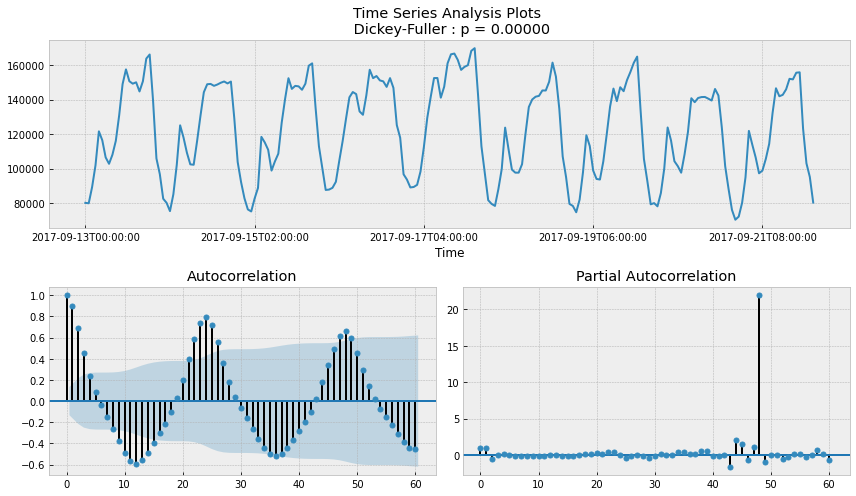

In [23]:
tsplot(ads.Ads, lags =60)

### The p value is 0 (<0.005) which means that the series is stationary, there is no trend & seasonality

### The ACF & PACF plots are also plotted above

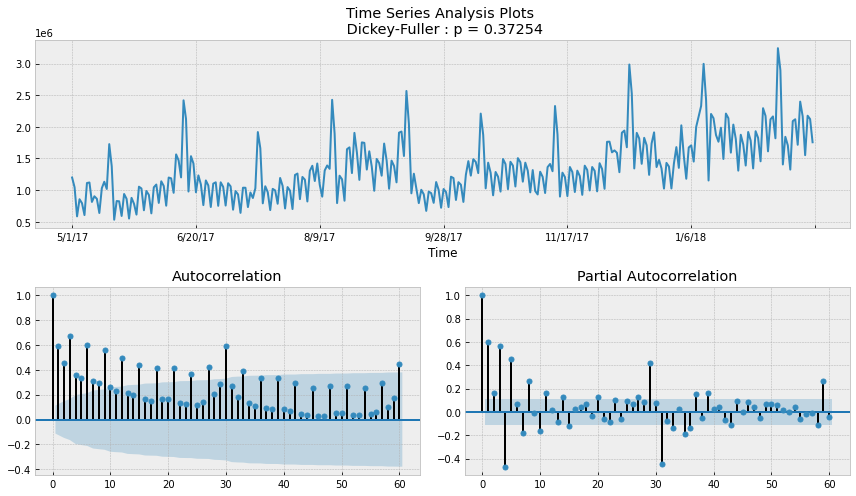

In [18]:
tsplot(currency.GEMS_GEMS_SPENT, lags =60)

### The p value is 0.37 (>0.005) which means that the series is Non stationary, there is trend & seasonality

--------------------------------------

# Moving Average for smoothing

In [19]:
def moving_average(series,n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

In [52]:
def plotMovingAverage(series, window, plot_intervals = False, scale = 1.96, plot_anomalies =False):
    """
        series = dataframe with timeseries
        window = rolling window size
        plot_intervals = show confidence intervals
        plot_anomalies= show anomalies
    """
    
    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,7))
    plt.title("Moving Average \n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label = "Rolling Mean trend")
    
    # Plot confidence interval for smoothed values
    
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        plt.plot(upper_bound, "r--", label ="Upper bound / lower bound")
        plt.plot(lower_bound, "r--")
        
        # Having the intervals find abnormal values
        
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns = series.columns)
            anomalies[series<lower_bound] = series[series<lower_bound]
            anomalies[series>upper_bound] = series[series>upper_bound]
            plt.plot(anomalies,"ro", markersize=10)
            
    plt.plot(series[window:], label = 'Actual values')
    plt.legend(loc="upper left")
    plt.axis('tight')
    plt.grid(True)

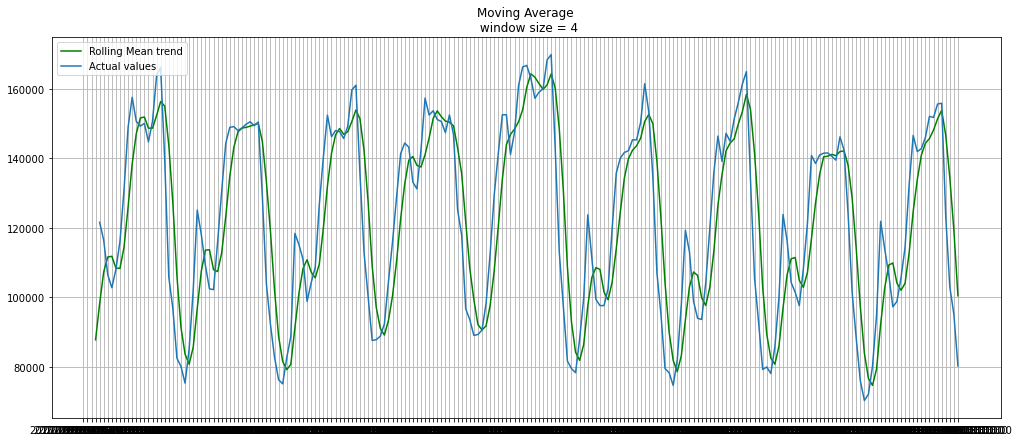

In [53]:
plotMovingAverage(ads,4)

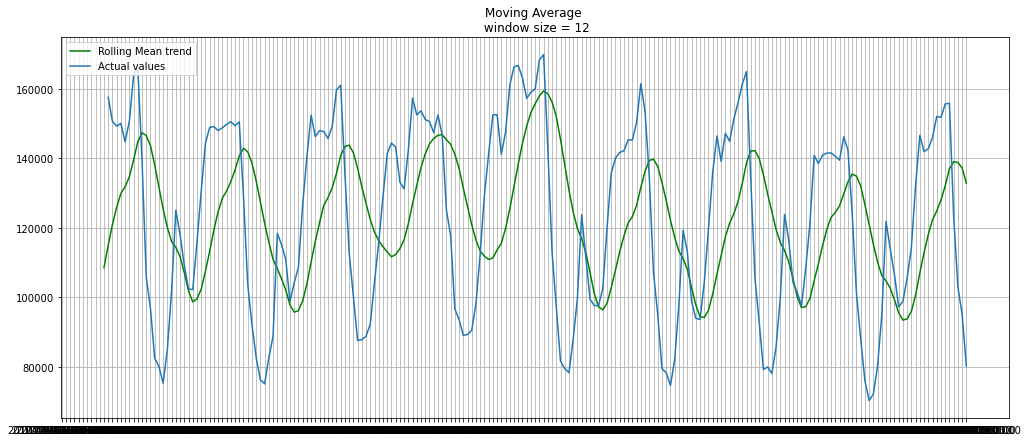

In [35]:
plotMovingAverage(ads,12)

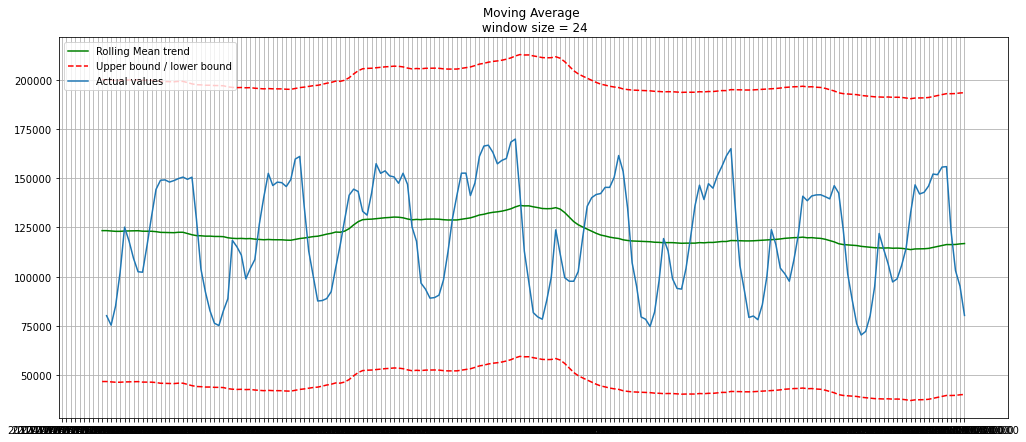

In [36]:
plotMovingAverage(ads,24, plot_intervals = True, plot_anomalies =True)

### The series plot gets smoothened here
### Increasing the window size can smoothen the series. Moving average can also be used to detrend the time series

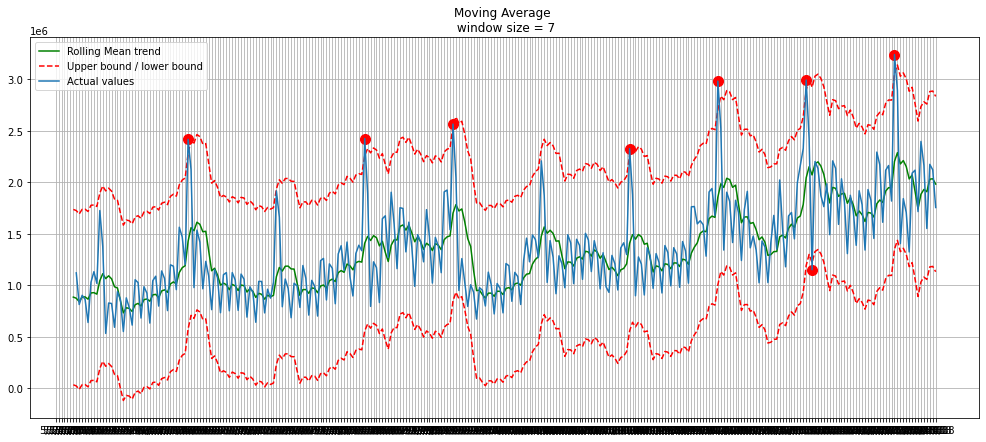

In [38]:
plotMovingAverage(currency, 7, plot_intervals = True, plot_anomalies =True)  #weekly smoothening for currency data

-----------------

# Exponential Smoothing

In [40]:
def exponential_smoothening(series, alpha):
    """
        series = dataset with timestamp
        alpha = float [0.0, 1.0], smoothening parameter
    """
    
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [43]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series = dataset with timestamp
        alpha = list of floats, smoothening parameters
    """
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(15,7))
        for alpha in alphas:
            plt.plot(exponential_smoothening(series, alpha), label = "Alpha {}".format(alpha))
        plt.plot(series.values, "c", label ="Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title('Exponential Smoothing')
        plt.grid(True)

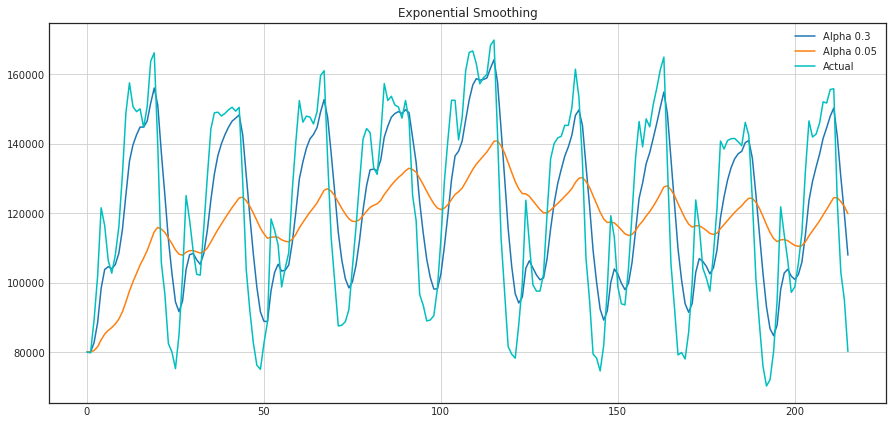

In [44]:
plotExponentialSmoothing(ads.Ads, [0.3,0.05])

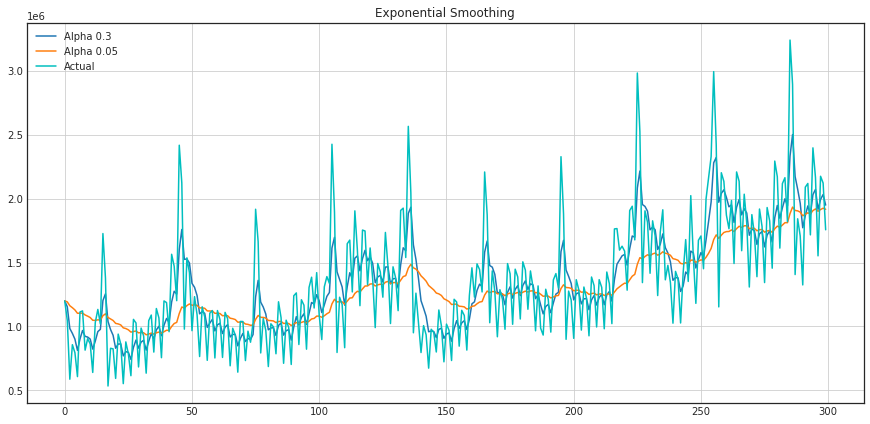

In [47]:
plotExponentialSmoothing(currency.GEMS_GEMS_SPENT, [0.3,0.05])

### this is another method of smoothing the series like Moving average method.
### Detrending is a popular way of making series stationary, thats what we does here. we does capture trend here.

--------------------------------------------------------